In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

In [10]:



X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from scipy.stats import loguniform

[11:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


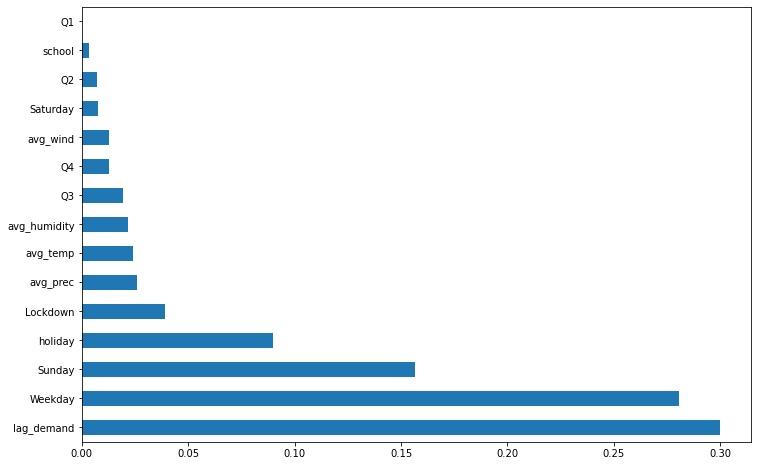

In [12]:
from xgboost import XGBRegressor
selection = XGBRegressor()
selection.fit(X_train, y_train)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [6]:
import numpy as np
from sklearn.metrics import r2_score

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def adj_r2(actual, pred, i):
    return 1 - ((1-r2_score(actual,pred))*(len(actual)-1)/(len(actual)-i-1))

In [7]:
model = SVR()
kernel = ["linear", "rbf", "sigmoid", "poly"]
tolerance = loguniform(1e-6, 1e-3)
C = [1, 1.5, 2, 2.5, 3]
grid = dict(kernel=kernel, tol=tolerance, C=C)

In [8]:
cvFold = KFold(n_splits=3, random_state=1)
svm_random = RandomizedSearchCV(estimator=model, n_jobs=-1,
    cv=cvFold, param_distributions=grid,
    scoring="neg_mean_squared_error")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [13]:

Xtrain_best = X_train[feat_importances.nlargest(6).index]
svm_random.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(6).index]
    
y_pred= svm_random.predict(Xtest_best)

y_pred_train = svm_random.predict(Xtrain_best)
    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)



from sklearn.metrics import r2_score
print(6,"features: ")
print(svm_random.best_params_)

print("RMSE for test set is: ",(mse**(1/2)))
print("RMSE for train set is: ", (mse_train**(1/2)))
    
r2_adjtest = adj_r2(y_test, y_pred,6)
r2_adjtrain = adj_r2(y_train, y_pred_train,6)
   
print("Adjusted R2 score for test: ",r2_adjtest)
print("Adjusted R2 score for training: ",r2_adjtrain)
    
mape_test = mape(y_test, y_pred)
mape_train = mape(y_train, y_pred_train)
    
print("MAPE for test: ",mape_test)
print("MAPE for training: ",mape_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6 features: 
{'C': 1.5, 'kernel': 'linear', 'tol': 6.29290119389305e-05}
RMSE for test set is:  1646.8633793125439
RMSE for train set is:  1519.0559356717272
Adjusted R2 score for test:  0.4887506156378548
Adjusted R2 score for training:  0.5347107661320776
MAPE for test:  8.159034048057629
MAPE for training:  7.858415212948769


In [15]:
Xtrain_best = X_train[feat_importances.nlargest(10).index]
svm_random.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(10).index]
    
y_pred= svm_random.predict(Xtest_best)

y_pred_train = svm_random.predict(Xtrain_best)
    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)



from sklearn.metrics import r2_score
print(6,"features: ")
print(svm_random.best_params_)

print("RMSE for test set is: ",(mse**(1/2)))
print("RMSE for train set is: ", (mse_train**(1/2)))
    
r2_adjtest = adj_r2(y_test, y_pred,10)
r2_adjtrain = adj_r2(y_train, y_pred_train,10)
   
print("Adjusted R2 score for test: ",r2_adjtest)
print("Adjusted R2 score for training: ",r2_adjtrain)
    
mape_test = mape(y_test, y_pred)
mape_train = mape(y_train, y_pred_train)
    
print("MAPE for test: ",mape_test)
print("MAPE for training: ",mape_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6 features: 
{'C': 1.5, 'kernel': 'linear', 'tol': 3.7460712002541257e-06}
RMSE for test set is:  1638.8250081989977
RMSE for train set is:  1500.8146390012203
Adjusted R2 score for test:  0.4885099853040791
Adjusted R2 score for training:  0.5446721478828087
MAPE for test:  8.146439615552207
MAPE for training:  7.849364117451758


In [17]:
Xtrain_best = X_train[feat_importances.nlargest(10).index]
svm_random.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(10).index]
    
y_pred= svm_random.predict(Xtest_best)

y_pred_train = svm_random.predict(Xtrain_best)
    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)



from sklearn.metrics import r2_score
print(10,"features: ")
print(svm_random.best_params_)

print("RMSE for test set is: ",(mse**(1/2)))
print("RMSE for train set is: ", (mse_train**(1/2)))
    
r2_adjtest = adj_r2(y_test, y_pred,10)
r2_adjtrain = adj_r2(y_train, y_pred_train,10)
   
print("Adjusted R2 score for test: ",r2_adjtest)
print("Adjusted R2 score for training: ",r2_adjtrain)
    
mape_test = mape(y_test, y_pred)
mape_train = mape(y_train, y_pred_train)
    
print("MAPE for test: ",mape_test)
print("MAPE for training: ",mape_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10 features: 
{'C': 2.5, 'kernel': 'linear', 'tol': 6.362524107592032e-05}
RMSE for test set is:  1619.4197927678827
RMSE for train set is:  1489.9305073401895
Adjusted R2 score for test:  0.5005513074145784
Adjusted R2 score for training:  0.5512524115442698
MAPE for test:  8.239188648626627
MAPE for training:  7.942439222007948


In [20]:
Xtrain_best = X_train[feat_importances.nlargest(12).index]
svm_random.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(12).index]
    
y_pred= svm_random.predict(Xtest_best)

y_pred_train = svm_random.predict(Xtrain_best)
    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)



from sklearn.metrics import r2_score
print(12,"features: ")
print(svm_random.best_params_)

print("RMSE for test set is: ",(mse**(1/2)))
print("RMSE for train set is: ", (mse_train**(1/2)))
    
r2_adjtest = adj_r2(y_test, y_pred,12)
r2_adjtrain = adj_r2(y_train, y_pred_train,12)
   
print("Adjusted R2 score for test: ",r2_adjtest)
print("Adjusted R2 score for training: ",r2_adjtrain)
    
mape_test = mape(y_test, y_pred)
mape_train = mape(y_train, y_pred_train)
    
print("MAPE for test: ",mape_test)
print("MAPE for training: ",mape_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12 features: 
{'C': 3, 'kernel': 'poly', 'tol': 0.0008026410461633671}
RMSE for test set is:  2234.0123517809316
RMSE for train set is:  2114.5453511010114
Adjusted R2 score for test:  0.04459489932765881
Adjusted R2 score for training:  0.09499190895096454
MAPE for test:  6.842035406552381
MAPE for training:  6.447534510924006


In [21]:
Xtrain_best = X_train[feat_importances.nlargest(14).index]
svm_random.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(14).index]
    
y_pred= svm_random.predict(Xtest_best)

y_pred_train = svm_random.predict(Xtrain_best)
    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)



from sklearn.metrics import r2_score
print(14,"features: ")
print(svm_random.best_params_)

print("RMSE for test set is: ",(mse**(1/2)))
print("RMSE for train set is: ", (mse_train**(1/2)))
    
r2_adjtest = adj_r2(y_test, y_pred,14)
r2_adjtrain = adj_r2(y_train, y_pred_train,14)
   
print("Adjusted R2 score for test: ",r2_adjtest)
print("Adjusted R2 score for training: ",r2_adjtrain)
    
mape_test = mape(y_test, y_pred)
mape_train = mape(y_train, y_pred_train)
    
print("MAPE for test: ",mape_test)
print("MAPE for training: ",mape_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14 features: 
{'C': 2.5, 'kernel': 'linear', 'tol': 1.7627670327171164e-06}
RMSE for test set is:  1620.8931698083443
RMSE for train set is:  1488.4722804871794
Adjusted R2 score for test:  0.49443001763756167
Adjusted R2 score for training:  0.5509972494456697
MAPE for test:  8.307890489852946
MAPE for training:  8.019612622959757


In [23]:
Xtrain_best = X_train[feat_importances.nlargest(16).index]
svm_random.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(16).index]
    
y_pred= svm_random.predict(Xtest_best)

y_pred_train = svm_random.predict(Xtrain_best)
    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)



from sklearn.metrics import r2_score
print(16,"features: ")
print(svm_random.best_params_)

print("RMSE for test set is: ",(mse**(1/2)))
print("RMSE for train set is: ", (mse_train**(1/2)))
    
r2_adjtest = adj_r2(y_test, y_pred,16)
r2_adjtrain = adj_r2(y_train, y_pred_train,16)
   
print("Adjusted R2 score for test: ",r2_adjtest)
print("Adjusted R2 score for training: ",r2_adjtrain)
    
mape_test = mape(y_test, y_pred)
mape_train = mape(y_train, y_pred_train)
    
print("MAPE for test: ",mape_test)
print("MAPE for training: ",mape_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16 features: 
{'C': 2, 'kernel': 'linear', 'tol': 1.6639648001288952e-06}
RMSE for test set is:  1628.7965534644754
RMSE for train set is:  1491.2266619083089
Adjusted R2 score for test:  0.48681489729638405
Adjusted R2 score for training:  0.5487631502007061
MAPE for test:  8.293500947687592
MAPE for training:  7.999519808033602


In [1]:
#best svr model with 10 parameters

# Final Support Vector Regression Model 

In [26]:
from sklearn.svm import SVR

regressor = SVR(C=2.5, kernel='linear', tol= 6.362524107592032e-05)

Xtrain_best = X_train[feat_importances.nlargest(10).index]
regressor.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(10).index]
    
y_pred= regressor.predict(Xtest_best)


    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE for test set is: ",(mse**(1/2)))
  
r2_adjtest = adj_r2(y_test, y_pred,13)

   
print("Adjusted R2 score for test: ",r2_adjtest)

mape_test = mape(y_test, y_pred)

print("MAPE for test: ",mape_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE for test set is:  1619.4197927678827
Adjusted R2 score for test:  0.4966594994204063
MAPE for test:  8.239188648626627


<Figure size 1440x1440 with 0 Axes>

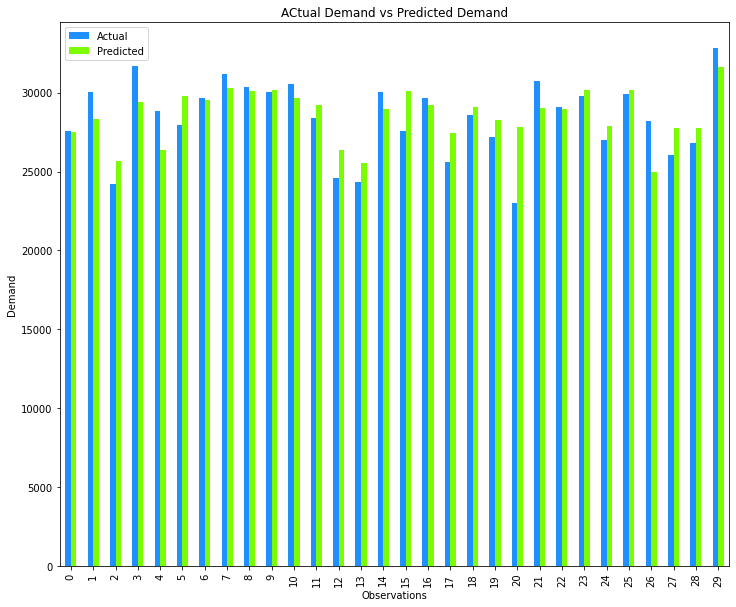

In [27]:
plt.figure(figsize= (20,20))
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis = 1)
df.columns = {"Actual","Predicted"}

df.head(30).plot(kind='bar',figsize=(12,10),color = {"dodgerblue","lawngreen"})
plt.title("ACtual Demand vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Demand")
plt.show()